In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Crop_recommendation.csv')

In [3]:
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
data.shape

(2200, 8)

In [6]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [9]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [10]:
data.isnull().sum


<bound method NDFrame._add_numeric_operations.<locals>.sum of           N      P      K  temperature  humidity     ph  rainfall  label
0     False  False  False        False     False  False     False  False
1     False  False  False        False     False  False     False  False
2     False  False  False        False     False  False     False  False
3     False  False  False        False     False  False     False  False
4     False  False  False        False     False  False     False  False
...     ...    ...    ...          ...       ...    ...       ...    ...
2195  False  False  False        False     False  False     False  False
2196  False  False  False        False     False  False     False  False
2197  False  False  False        False     False  False     False  False
2198  False  False  False        False     False  False     False  False
2199  False  False  False        False     False  False     False  False

[2200 rows x 8 columns]>

In [11]:
data.dropna(inplace=True)

In [12]:
data.duplicated().sum()

0

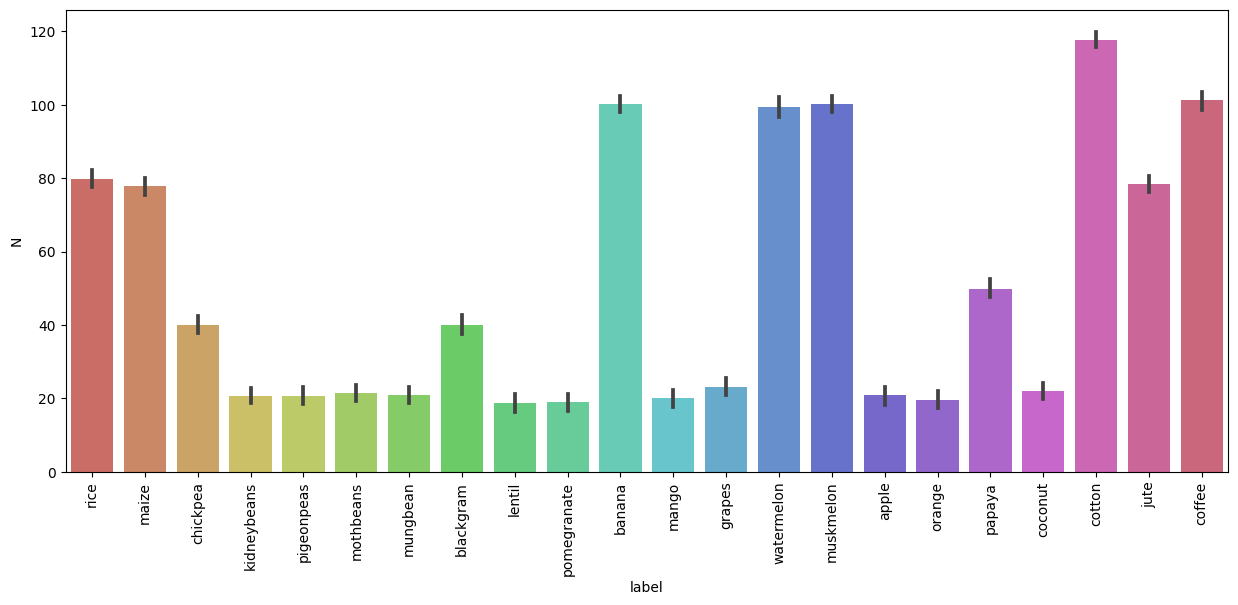

In [13]:
plt.figure(figsize=(15,6))
sns.barplot(y="N", x="label", data=data,palette="hls")
plt.xticks(rotation=90)
plt.show()

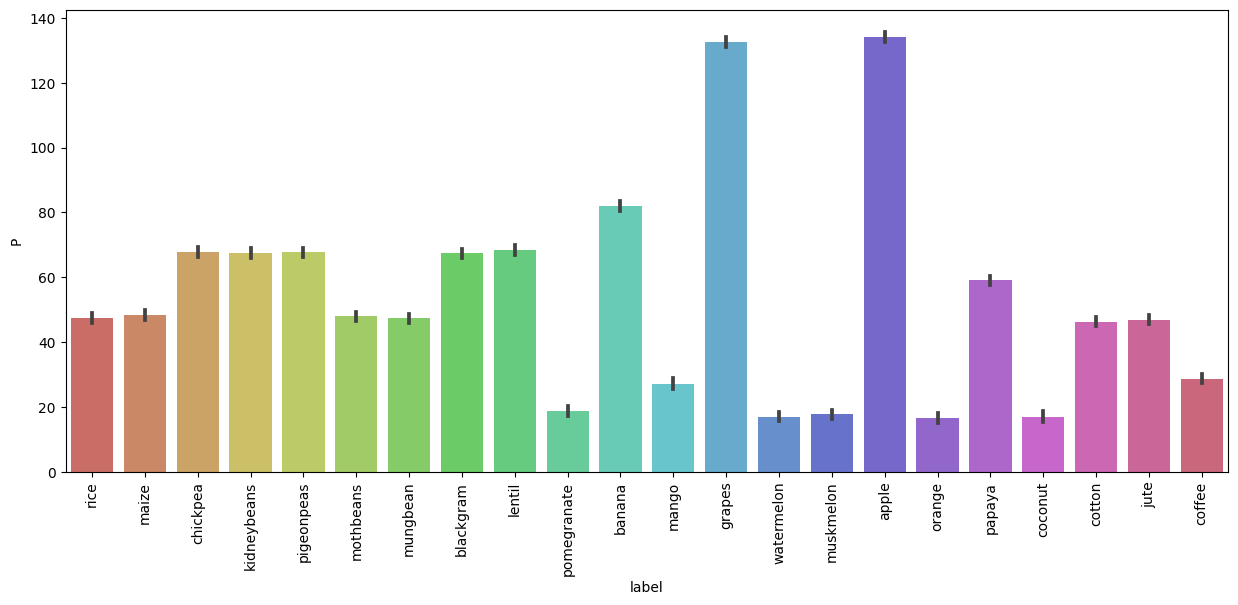

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(y="P", x="label", data=data,palette="hls")
plt.xticks(rotation=90)
plt.show()

In [15]:
import random
from IPython.core.display import update_display

In [ ]:
data.corr()

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [18]:
features = data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = data['label']
#features = data[['temperature', 'humidity', 'ph', 'rainfall']]
labels = data['label']

In [19]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [20]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [21]:
#RF
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [22]:
data = np.array([[10,18, 59, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['pomegranate']


In [23]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [24]:
data = np.array([[60, 55, 44, 23, 82.3, 7.8, 263]])
prediction = RF.predict(data)
print(prediction)

['rice']


In [25]:
data = np.array([[34, 65, 41, 29, 90, 6, 221]])
prediction = RF.predict(data)
print(prediction)

['papaya']


In [32]:
import tkinter as tk
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the crop recommendation dataset
crop_data = pd.read_csv('Crop_recommendation.csv')

# Initialize the random forest classifier
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(crop_data.iloc[:, :-1], crop_data.iloc[:, -1])

# Create the Tkinter GUI window
root = tk.Tk()
root.geometry('600x400')
root.title('Crop Recommendation System')



# Create the label for the input fields
input_label = tk.Label(root, text='Enter the following parameters for your soil:')
input_label.pack(pady=10)

# Create the labels and entry fields for each input parameter
n_label = tk.Label(root, text='Nitrogen (N):')
n_label.pack()
n_entry = tk.Entry(root)
n_entry.pack()

p_label = tk.Label(root, text='Phosphorous (P):')
p_label.pack()
p_entry = tk.Entry(root)
p_entry.pack()

k_label = tk.Label(root, text='Potassium (K):')
k_label.pack()
k_entry = tk.Entry(root)
k_entry.pack()

temp_label = tk.Label(root, text='Temperature (°C):')
temp_label.pack()
temp_entry = tk.Entry(root)
temp_entry.pack()

humid_label = tk.Label(root, text='Humidity (%):')
humid_label.pack()
humid_entry = tk.Entry(root)
humid_entry.pack()

ph_label = tk.Label(root, text='pH:')
ph_label.pack()
ph_entry = tk.Entry(root)
ph_entry.pack()

rain_label = tk.Label(root, text='Rainfall (mm):')
rain_label.pack()
rain_entry = tk.Entry(root)
rain_entry.pack()

# Create the function to get the input values and generate the crop recommendation
def get_crop():
    # Get the input values from the entry fields
    N = float(n_entry.get())
    P = float(p_entry.get())
    K = float(k_entry.get())
    temp = float(temp_entry.get())
    humid = float(humid_entry.get())
    pH = float(ph_entry.get())
    rainfall = float(rain_entry.get())

    # Use the random forest classifier to predict the crop based on the input values
    prediction = RF.predict([[N, P, K, temp, humid, pH, rainfall]])

    # Display the recommended crop
    result_label.config(text=f"The recommended crop for your soil is: {prediction[0]}")

# Create the button to submit the input values and generate the crop recommendation
submit_button = tk.Button(root, text='Submit', command=get_crop)
submit_button.pack(pady=10)

# Create the label to display the recommended crop
result_label = tk.Label(root, text='')
result_label.pack()

# Run the Tkinter event loop
root.mainloop()
